# Hacking Food & Nutrition : Team Harvey Wiley

## Topic: Effects of Uganda's Nutrional Action Plan

## Goals: 

- Examine the efficacy of the Uganda's Nutrition Action Plan (2011 - 2016) using the data provided for Uganda.
    - Did the NAP make a difference in HH ability to meet nutritional needs?  How big of a difference?
- Evaluate what kinds of policies might be effective at improving nutritional outcomes for particular populations. 
- Future steps: what future plans will benefit Uganda? Target popiulation? Cost?

## Table of Contents: 
* [(A) Choice of a dataset](#population)
* [(A) Estimate Demand System](#demand)

### Setup

In [2]:
#!pip install -r requirements.txt
import numpy as np
import pandas as pd
from eep153_tools.sheets import read_sheets

In [3]:
# Import whole Google Sheet
Uganda_Dataog = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Uganda_Data = "1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA" #See Note

#Note: Uganda_Data created solely for creating consumotion tables using more detailed labels, link available below
# https://docs.google.com/spreadsheets/d/1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA/edit#gid=1174957327

## (A) Choice of a dataset (and data setup for consumption) <a class="anchor" id="population"></a>

In [4]:
# Importing expenditure in different years

Expenditure_2009 = read_sheets(Uganda_Data,sheet = 'Expenditures (2009-2010)')
Expenditure_2013 = read_sheets(Uganda_Data,sheet = 'Expenditures (2013-2014)')
Expenditure_2019 = read_sheets(Uganda_Data,sheet = 'Expenditures (2019-2020)')

# Input price table
Price =  read_sheets(Uganda_Data,sheet = 'Prices')

# Replace the 'na' valyes w/ '0'
Expenditure_2009 = Expenditure_2009.replace(np.nan,0)
Expenditure_2013 = Expenditure_2013.replace(np.nan,0)
Expenditure_2019 = Expenditure_2019.replace(np.nan,0)
Price = Price.replace(np.nan,0)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
# Create Food List 
food_list = ['Beans','Beef','Beer','Biscuits','Bongo','Bread',
             'Butter','Cabbages','Cake','Cassava','Cassava (flour)',
             'Chapati','Cheese','Chicken','Cigarettes','Coffee','Cooking Oil',
             'Cornflakes','Dodo','Donut','Eggs','Fish (dried)','Fish (fresh)',
             'Garlic','Ghee','Ginger','Goat','Ground Nuts','Honey','Ice Cream',
             'Infant Formula','Irish Potatoes','Jackfruit','Jam/Marmalade',
             'Kabalagala','Macaroni/Spaghetti','Maize','Mangos','Matoke','Milk (fresh)',
             'Milk (powdered)','Millet','Onions','Oranges','Other Alcohol','Other Drinks',
             'Other Fruits','Other Juice','Other Meat','Other Spices','Other Tobacco','Other Veg.',
             'Passion Fruits','Peas','Plantains','Pork','Rice','Salt','Samosa','Sim Sim','Soda',
             'Sorghum','Soybean','Sugar','Sugarcane','Sweet Bananas','Sweet Potatoes','Tea','Tomatoes',
             'Waragi','Water','Wheat (flour)','Yam','Yogurt']

In [6]:
#Filtering price data

# Filter price data for 2011-12
Price_data_2009 = Price[Price['t'] == '2009-10']
#Price_data_2009

# Filter price data for 2013-14
Price_data_2013 = Price[Price['t'] == '2013-14']
#Price_data_2013

# Filter price data for 2015-16
Price_data_2019 = Price[Price['t'] == '2019-20']
#Price_data_2019


In [7]:
#Merge price & expenditure data

#Price_data_2009 Expenditure_2009
merged_data_2009 = pd.merge(Expenditure_2009,Price_data_2009, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2011

#Price_data_2013 Expenditure_2013
merged_data_2013 = pd.merge(Expenditure_2013,Price_data_2013, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2013

#Price_data_2019 Expenditure_2019
merged_data_2019 = pd.merge(Expenditure_2019,Price_data_2019, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2019

In [9]:
#Consumption Tables 

food_columns = food_list
for food in food_columns:
    merged_data_2009[food + '_consumption'] = merged_data_2009[food + '_expenditure'] / merged_data_2009[food + '_price']

# replace na to 0
merged_data_2009 = merged_data_2009.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2009 = merged_data_2009[columns_to_keep]
print("2009-10 Consumption")
consumption_data_2009

2009-10 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2009-10,Central,0.0,0.0,0.0,0.0,0.0,1.041667,0.0,...,0.0,0.00,3.000000,0.0000,1.666667,0.0,0.0,0.0,0.0,0.0
1,1013000204,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,...,0.0,9.25,0.000000,0.0000,3.333333,0.0,0.0,0.0,0.0,0.0
2,1013000206,2009-10,Central,0.0,0.0,0.0,0.0,0.0,1.250000,0.0,...,0.0,9.25,0.000000,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0
3,1013000210,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
4,101300021302,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,2.000000,0.2500,1.666667,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,3213003007,2009-10,Northern,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,2.222222,0.0625,2.333333,0.0,0.0,0.0,0.0,0.0
2886,3213003008,2009-10,Northern,2.8,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.444444,0.1250,0.000000,0.0,0.0,0.0,0.0,0.0
2887,321300300802,2009-10,Northern,4.5,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.444444,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0
2888,3213003009,2009-10,Northern,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.1250,0.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
food_columns = food_list
for food in food_columns:
    merged_data_2013[food + '_consumption'] = merged_data_2013[food + '_expenditure'] / merged_data_2013[food + '_price']

# replace na to 0
merged_data_2013 = merged_data_2013.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2013 = merged_data_2013[columns_to_keep]
print("2013-14 Consumption")
consumption_data_2013

2013-14 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2013-14,Central,0.75,0.000000,0.0,0.0,0.0,0.457143,0.0,...,0.0,0.00,8.079208,0.0000,2.240000,0.0,0.0,0.0,0.0,0.0
1,1013000202,2013-14,Central,2.50,0.000000,0.0,0.0,0.0,0.071429,0.0,...,0.0,0.00,4.847525,0.0225,1.440000,0.0,0.0,0.0,0.0,0.0
2,1013000204,2013-14,Central,1.20,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.039604,0.0300,2.240000,0.0,0.0,0.0,0.0,0.0
3,1021000108,2013-14,Central,3.20,0.875000,0.0,0.0,0.0,1.028571,0.0,...,0.0,0.00,1.615842,0.0750,3.200000,0.0,0.0,0.0,0.0,0.0
4,1021000109,2013-14,Central,1.50,1.125000,0.0,0.0,0.0,0.514286,0.0,...,0.0,0.00,1.615842,0.0300,3.200000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,H40605-04-01,2013-14,Northern,0.25,0.285714,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.778032,0.0150,2.133333,0.0,0.0,0.0,0.0,0.0
3078,H40607-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.0000,1.866667,0.0,0.0,0.0,0.0,0.0
3079,H40608-04-01,2013-14,Northern,1.30,0.000000,0.0,0.0,0.0,1.750000,0.0,...,0.0,0.60,0.778032,0.0300,4.000000,0.0,0.0,0.0,0.0,0.0
3080,H40609-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.24,0.000000,0.0000,2.666667,0.0,0.0,0.0,0.0,0.0


In [11]:
food_columns = food_list
for food in food_columns:
    merged_data_2019[food + '_consumption'] = merged_data_2019[food + '_expenditure'] / merged_data_2019[food + '_price']

# replace na to 0
merged_data_2019 = merged_data_2019.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2019 = merged_data_2019[columns_to_keep]
print("2019-20 Consumption")
consumption_data_2019

2019-20 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,1.582418,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,5.034965,0.020000,1.600000,0.0,0.0,0.0,0.865775,0.0
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,0.000000,0.00,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.439560,0.45,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.280000,0.0,0.0,0.0,0.000000,0.0
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,1.230769,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,6.293706,0.020000,0.800000,0.0,0.0,0.0,0.000000,0.0
4,1083001603,2019-20,Eastern,2.637363,0.00,0.0,0.0,0.3,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.800000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,_62,2019-20,Western,0.818182,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,2.720000,0.000000,2.000000,0.0,0.0,0.0,0.000000,0.0
3005,_67,2019-20,Western,2.727273,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,2.720000,0.017143,0.000000,0.0,0.0,0.0,0.000000,0.0
3006,a98bebba177243668464e31f6d2bb92d,2019-20,Western,6.818182,2.00,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,8.160000,0.128571,6.666667,0.0,1.5,0.0,0.000000,0.0
3007,acb16f9b068549d8a80a37c9d638742f,2019-20,Western,1.272727,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.333333,0.0,0.0,0.0,0.000000,0.0


## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [12]:
x = read_sheets(Uganda_Dataog,sheet='Expenditures (2019-20)')
x.columns.name = 'j'
                 
d = read_sheets(Uganda_Dataog,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [13]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [14]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [15]:
from cfe import Regression

result = Regression(y=y,d=d)

In [16]:
result.predicted_expenditures()

i                                 t        m         j             
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans             3555.677276
                                                     Beef              8401.789558
                                                     Biscuits           842.091521
                                                     Bread             3077.266434
                                                     Cabbages          1199.255865
                                                                          ...     
e07bc322c4884559b4b8ca75c945dd3e  2019-20  Northern  Sweet Potatoes    6706.688800
                                                     Tea                201.911345
                                                     Tomatoes          1349.788766
                                                     Waragi            4423.328381
                                                     Yam               2839.871449
Length: 101010, dty

<IPython.core.display.Javascript object>


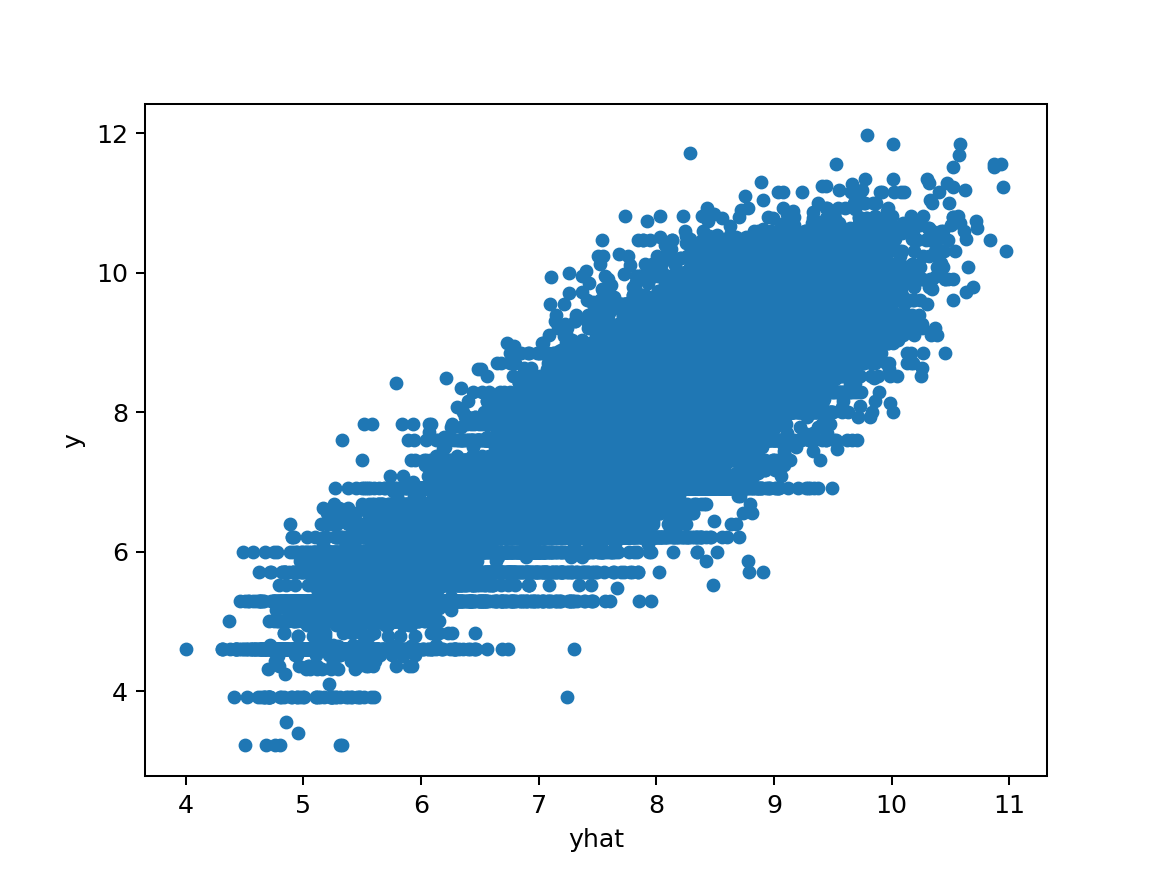

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [17]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

In [18]:
result.get_beta().sort_values()

j
Cassava           0.089645
Salt              0.104366
Millet            0.163091
Peas              0.221420
Beans             0.229586
Dodo              0.231391
Waragi            0.234374
Onions            0.234774
Sweet Potatoes    0.248343
Eggs              0.259851
Matoke            0.270251
Fish (dried)      0.283041
Cabbages          0.286388
Tea               0.295146
Beef              0.298503
Maize             0.299072
Cooking Oil       0.299955
Pork              0.301544
Ground Nuts       0.311495
Tomatoes          0.330459
Yam               0.353646
Rice              0.356148
Mangos            0.366501
Kabalagala        0.392616
Sim Sim           0.398601
Other Veg.        0.407817
Sweet Bananas     0.433388
Soda              0.453436
Chapati           0.456309
Bread             0.465375
Oranges           0.484020
Other Fruits      0.491350
Milk (fresh)      0.542295
Biscuits          0.571134
Fish (fresh)      0.603296
Name: beta, dtype: float64

/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  B[its] = estimate_beta(MdMpY.groupby(['t','m']).sample(frac=1,replace=True))[0]
/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  B[its] = estimate_beta(MdMpY.groupby(['t','m']).sample(frac=1,replace=True))[0]
/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

<IPython.core.display.Javascript object>


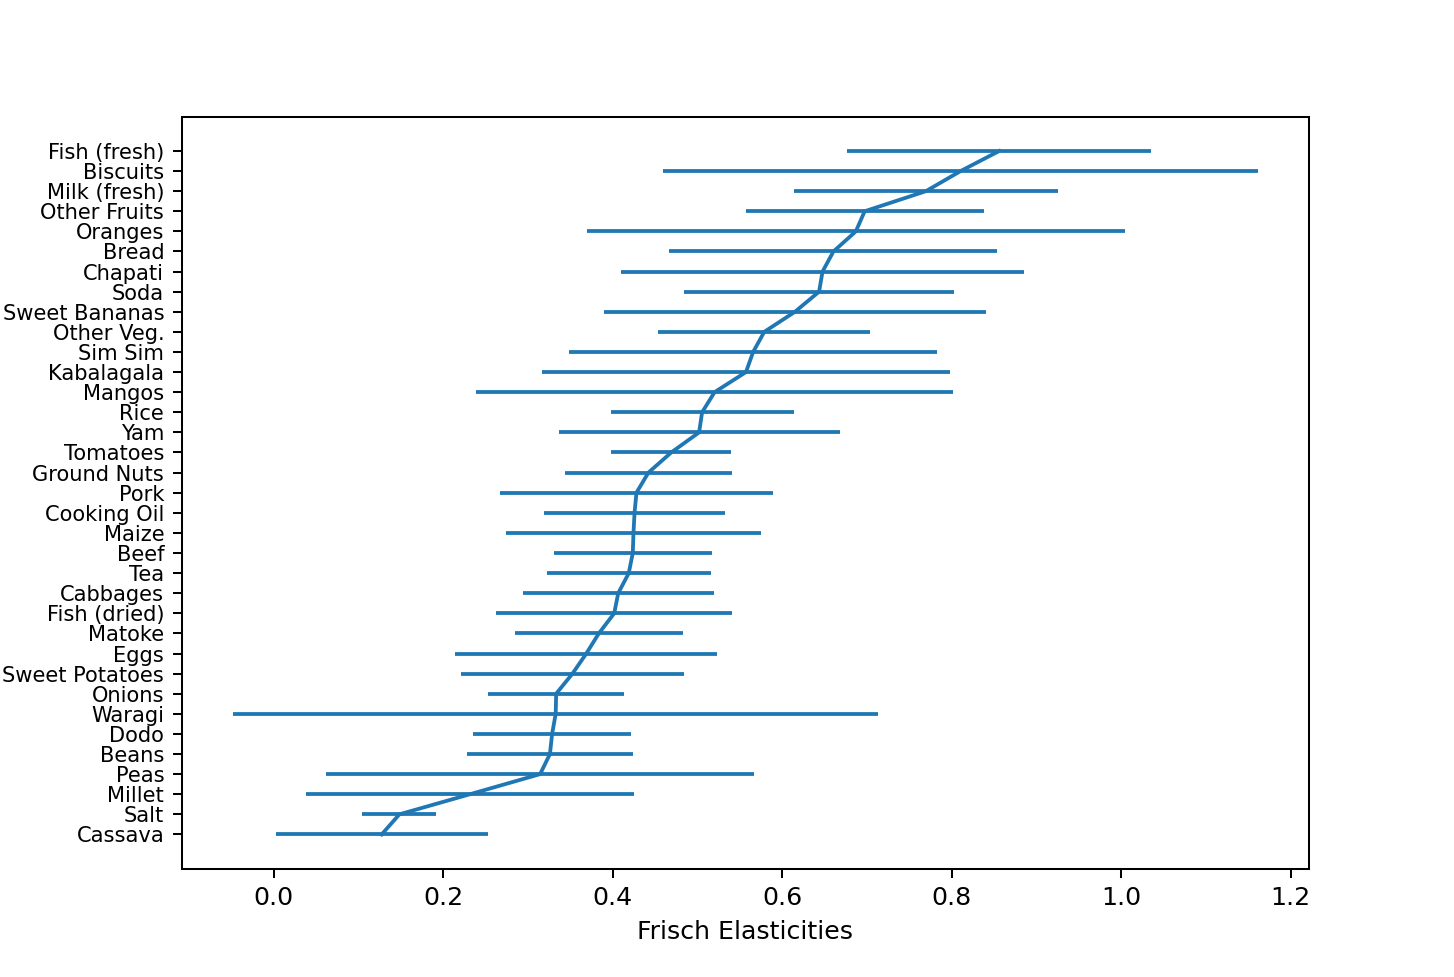

<IPython.core.display.Javascript object>


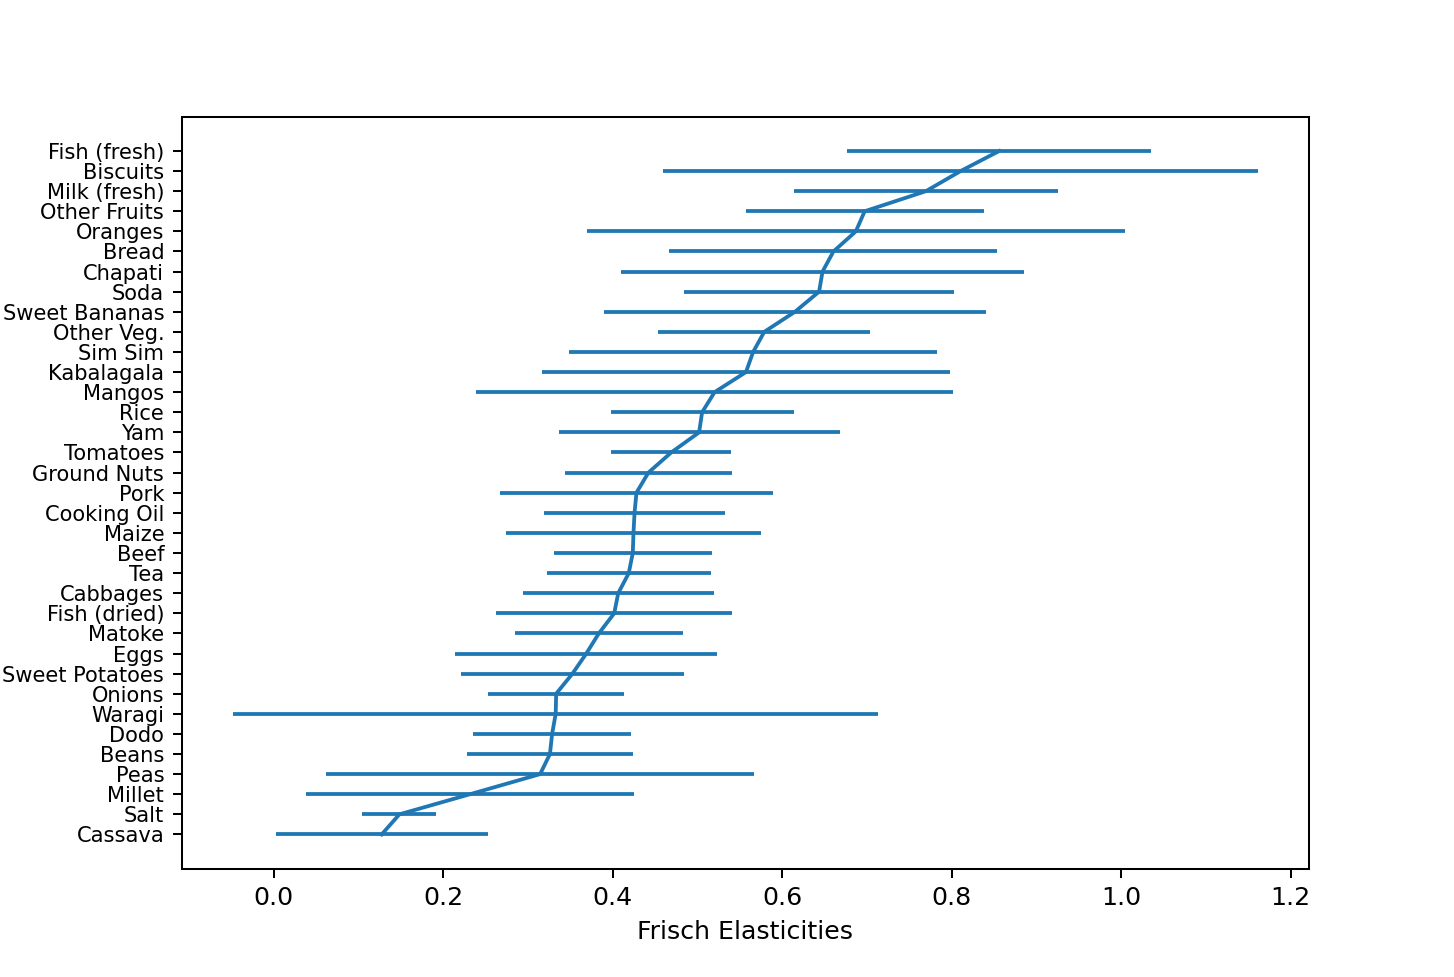

In [19]:
result.graph_beta()

In [20]:
result.gamma

k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.124336,0.035231,0.090377,0.004499,-0.007870,0.022907,0.102685,-0.042510,0.022145,0.064256,0.063150,0.041227,0.011180,0.114473,0.391925,-0.765806
Beef,-0.133073,0.012580,0.015526,0.014861,0.082507,0.061304,0.189160,-0.042146,0.021119,-0.009366,0.048574,0.077610,0.170483,0.171712,0.252517,-0.676754
Biscuits,0.038606,-0.000608,-0.026963,0.101941,0.015177,0.244867,0.289385,0.243284,0.039812,-0.050499,-0.058406,0.046866,0.170904,-0.127918,-0.075380,-0.409758
Bread,-0.064686,0.027238,-0.092955,-0.008487,0.061894,0.057456,0.084374,-0.128560,0.073478,-0.041311,-0.019199,0.013019,0.074366,0.078168,0.398146,-0.751295
Cabbages,0.007378,-0.058572,0.029930,0.037955,-0.026252,0.036936,0.081504,-0.045031,0.033217,0.013162,0.042502,0.069609,0.030480,0.068790,0.232485,-0.513702
Cassava,0.019206,0.089485,0.105922,0.042049,-0.004145,0.072680,0.156273,-0.003705,0.134056,0.186236,0.135270,0.062836,0.098303,0.118365,0.148453,-0.711646
Chapati,-0.034054,-0.008517,0.065749,0.090993,0.023017,0.006971,-0.090070,0.007639,0.082807,-0.036377,-0.016584,0.067900,0.093947,0.153264,0.162986,-0.412577
Cooking Oil,-0.088741,-0.050446,-0.052850,0.011923,0.028813,0.017072,-0.079372,-0.086822,-0.083002,-0.041623,-0.007363,-0.034479,0.005265,0.052592,0.418256,-0.517449
Dodo,-0.083900,-0.011246,0.091461,0.040517,0.049264,0.073878,0.182246,-0.021156,0.021386,0.088145,-0.009156,0.044575,0.063169,0.162541,0.170590,-0.539539


In [22]:
result.to_pickle('my_estimates.pickle')